## Semantic Types

In [2]:
from dotenv import load_dotenv
load_dotenv(override=True)

import pandas as pd
import os
from os.path import join
import sys
import json

sport_domains = ["baseball", "basketball", "football", "hockey", "soccer"]

semantic_type_dict = {}

for sport_domain in sport_domains:
    textual_types = []
    numerical_types = []
    with open(f"./{sport_domain}/metadata.json") as f:
        type_dict = json.load(f)
    
    for table_key in type_dict.keys():
        for columm_key in type_dict[table_key]["textual_cols"].keys():
            if type_dict[table_key]["textual_cols"][columm_key] != None:
                textual_types.append(type_dict[table_key]["textual_cols"][columm_key])  
              
        for columm_key in type_dict[table_key]["numerical_cols"].keys():
            if type_dict[table_key]["numerical_cols"][columm_key] != None:
                numerical_types.append(type_dict[table_key]["numerical_cols"][columm_key]) 
    
    
    semantic_type_dict[sport_domain] = {
        "textual_types": list(set(textual_types)),
        "numerical_types": list(set(numerical_types))
    }
        

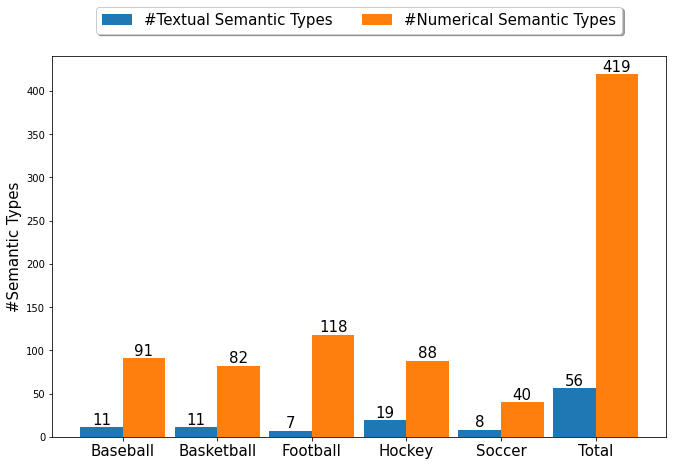

In [3]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(11,7))

rects = []

totals = {"textual_types": 0, "numerical_types": 0}

## domain specific plot
for idx,sport_domain in enumerate(sport_domains):
    totals["textual_types"] += len(semantic_type_dict[sport_domain]["textual_types"])
    totals["numerical_types"] += len(semantic_type_dict[sport_domain]["numerical_types"])
    rects.append(ax.bar([idx-width/2], [len(semantic_type_dict[sport_domain]["textual_types"])], width=width, label="#Textual Semantic Types", color="C0"))
    rects.append(ax.bar([idx+width/2], [len(semantic_type_dict[sport_domain]["numerical_types"])], width=width, label="#Numerical Semantic Types", color="C1"))

## total bar plot
rects.append(ax.bar([5-width/2], [totals["textual_types"]], width=width))
rects.append(ax.bar([5+width/2], [totals["numerical_types"]], width=width))

fontsize = 15
for rect in rects:
    ax.bar_label(rect, fontsize=fontsize)
    
ax.set_xticks([0,1,2,3,4,5],["Baseball", "Basketball", "Football", "Hockey", "Soccer","Total"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Semantic Types", fontsize=fontsize)
ax.legend(handles=[rects[0], rects[1]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.show()


## Number of textual and numerical columns

In [4]:
from dotenv import load_dotenv
load_dotenv(override=True)

import pandas as pd
import os
from os.path import join
import sys
import json
import glob

sport_domains = ["baseball", "basketball", "football", "hockey", "soccer"]

stats_results = []

for sport_domain in sport_domains:
    with open(f"./{sport_domain}/metadata.json") as f:
        col_type_dict = json.load(f)
        
    for idx, table_key in enumerate(col_type_dict.keys()):
        #if table_key != "all_managers":
        #    continue
        #print(table_key)
        for table in glob.glob(join(os.environ["SportsTables"], sport_domain, f"*{table_key}*.csv")):
            number_of_textual_cols = 0
            number_of_numerical_cols = 0
            
            #print(table.split("/")[-1])
            df = pd.read_csv(table)
            
            #print(list(df.columns))
            for col in list(df.columns):
                if col in col_type_dict[table_key]["textual_cols"]:
                    if col_type_dict[table_key]["textual_cols"][col] != None:
                        #print("textual")
                        number_of_textual_cols += 1
                if col in col_type_dict[table_key]["numerical_cols"]:
                    if col_type_dict[table_key]["numerical_cols"][col] != None:
                        #print("numerical")
                        number_of_numerical_cols += 1
            stats_results.append([sport_domain, table.split("/")[-1], number_of_textual_cols, number_of_numerical_cols, len(df)])
            
df_stats = pd.DataFrame(stats_results, columns=["sport_domain", "table_name", "#textual_col", "#numerical_col", "#rows"])
df_stats["#col"] = df_stats["#textual_col"] + df_stats["#numerical_col"]

In [5]:
df_stats

,sport_domain,table_name,#textual_col,#numerical_col,#rows,#col
0,baseball,mlb_all_managers.csv,2,21,834,23
1,baseball,mlb_all_teams.csv,1,21,30,22
2,baseball,mlb_season_team_batting_stats_2000.csv,1,28,31,29
3,baseball,mlb_season_team_batting_stats_2001.csv,1,28,31,29
4,baseball,mlb_season_team_batting_stats_2002.csv,1,28,31,29
...,...,...,...,...,...,...
1182,soccer,Serie-A_season_standings_1998.csv,4,11,18,15
1183,soccer,Premier-League_season_standings_1999.csv,4,11,20,15
1184,soccer,La-Liga_season_standings_1999.csv,4,11,20,15
1185,soccer,Ligue-1_season_standings_1999.csv,4,11,18,15


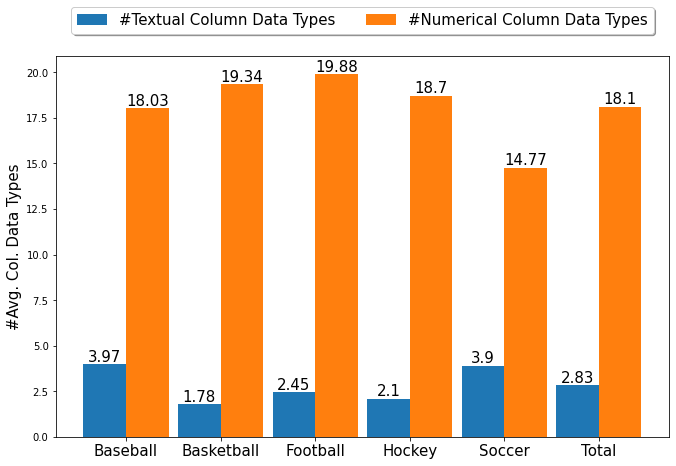

In [6]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(11,7))

rects = []

## domain specific plot
for idx,sport_domain in enumerate(sport_domains):
    rects.append(ax.bar([idx-width/2], [round(df_stats[df_stats["sport_domain"] == sport_domain]["#textual_col"].mean(),2)], width=width, label="#Textual Column Data Types", color="C0"))
    rects.append(ax.bar([idx+width/2], [round(df_stats[df_stats["sport_domain"] == sport_domain]["#numerical_col"].mean(),2)], width=width, label="#Numerical Column Data Types", color="C1"))

## total bar plot
rects.append(ax.bar([5-width/2], [round(df_stats["#textual_col"].mean(),2)], width=width))
rects.append(ax.bar([5+width/2], [round(df_stats["#numerical_col"].mean(),2)], width=width))

fontsize = 15
for rect in rects:
    ax.bar_label(rect, fontsize=fontsize)
    
ax.set_xticks([0,1,2,3,4,5],["Baseball", "Basketball", "Football", "Hockey", "Soccer","Total"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Avg. Col. Data Types", fontsize=fontsize)
ax.legend(handles=[rects[0], rects[1]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.show()

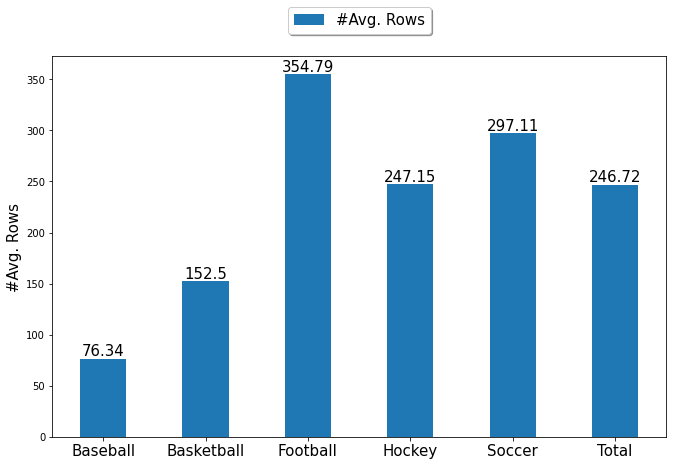

In [7]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(11,7))

rects = []

## domain specific plot
for idx,sport_domain in enumerate(sport_domains):
    rects.append(ax.bar([idx], [round(df_stats[df_stats["sport_domain"] == sport_domain]["#rows"].mean(),2)], width=width, label="#Avg. Rows", color="C0"))

## total bar plot
rects.append(ax.bar([5], [round(df_stats["#rows"].mean(),2)], width=width))

fontsize = 15
for rect in rects:
    ax.bar_label(rect, fontsize=fontsize)
    
ax.set_xticks([0,1,2,3,4,5],["Baseball", "Basketball", "Football", "Hockey", "Soccer","Total"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Avg. Rows", fontsize=fontsize)
ax.legend(handles=[rects[0]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.show()

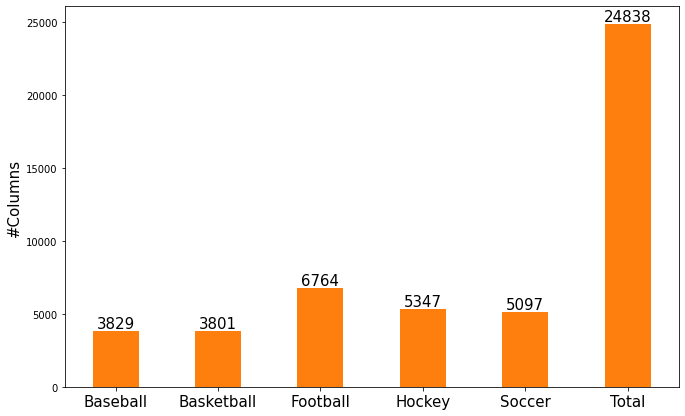

In [8]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(11,7))

rects = []

## domain specific plot
for idx,sport_domain in enumerate(sport_domains):
    rects.append(ax.bar([idx], [df_stats[df_stats["sport_domain"] == sport_domain]["#col"].sum()], width=width, label="#Tables", color="C1"))

## total bar plot
rects.append(ax.bar([5], [df_stats["#col"].sum()], width=width, color="C1"))

fontsize = 15

for rect in rects: 
    ax.bar_label(rect, fontsize=fontsize)
    
ax.set_xticks([0,1,2,3,4,5],["Baseball", "Basketball", "Football", "Hockey", "Soccer","Total"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Columns", fontsize=fontsize)
#ax.legend(handles=[rects[0]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.show()

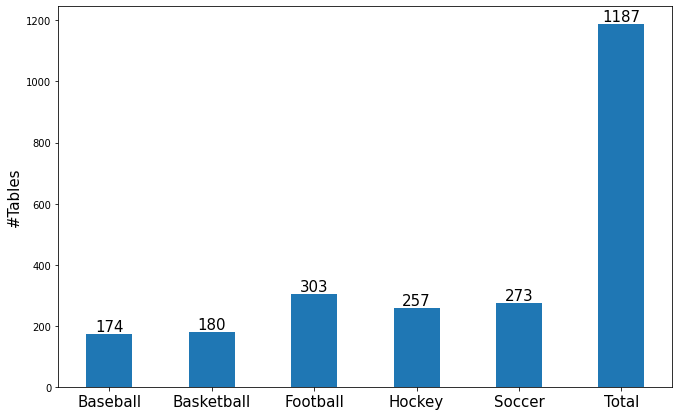

In [9]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(11,7))

rects = []

## domain specific plot
for idx,sport_domain in enumerate(sport_domains):
    rects.append(ax.bar([idx], [len(df_stats[df_stats["sport_domain"] == sport_domain])], width=width, label="#Tables", color="C0"))

## total bar plot
rects.append(ax.bar([5], [len(df_stats)], width=width))

fontsize = 15

for rect in rects: 
    ax.bar_label(rect, fontsize=fontsize)
    
ax.set_xticks([0,1,2,3,4,5],["Baseball", "Basketball", "Football", "Hockey", "Soccer","Total"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Tables", fontsize=fontsize)
#ax.legend(handles=[rects[0]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.show()

## Cols per Semantic Type

In [10]:
from dotenv import load_dotenv
load_dotenv(override=True)

import pandas as pd
import os
from os.path import join
import sys
import json
import glob

sport_domains = ["baseball", "basketball", "football", "hockey", "soccer"]

from dotenv import load_dotenv
load_dotenv(override=True)

import pandas as pd
import os
from os.path import join
import sys
import json
import glob

sport_domains = ["baseball", "basketball", "football", "hockey", "soccer"]

stats_results = {
    "textual_types":{},
    "numerical_types": {}
}

for sport_domain in sport_domains:
    # if sport_domain != "baseball":
    #     continue
    with open(f"./{sport_domain}/metadata.json") as f:
        col_type_dict = json.load(f)
        
    for idx, table_key in enumerate(col_type_dict.keys()):
        # if table_key != "all_managers":
        #     continue
        #print(table_key)
        for table in glob.glob(join(os.environ["SportsTables"], sport_domain, f"*{table_key}*.csv")):

            
            #print(table.split("/")[-1])
            df = pd.read_csv(table)
            
            #print(list(df.columns))
            for col in list(df.columns):
                if col in col_type_dict[table_key]["textual_cols"]:
                    if col_type_dict[table_key]["textual_cols"][col] != None:
                        if col_type_dict[table_key]["textual_cols"][col] in stats_results["textual_types"]:
                            stats_results["textual_types"][col_type_dict[table_key]["textual_cols"][col]] +=1
                        else:
                            stats_results["textual_types"][col_type_dict[table_key]["textual_cols"][col]] = 1

                if col in col_type_dict[table_key]["numerical_cols"]:
                    if col_type_dict[table_key]["numerical_cols"][col] != None:
                        if col_type_dict[table_key]["numerical_cols"][col] in stats_results["numerical_types"]:
                            stats_results["numerical_types"][col_type_dict[table_key]["numerical_cols"][col]] +=1
                        else:
                            stats_results["numerical_types"][col_type_dict[table_key]["numerical_cols"][col]] = 1


results = []

for data_type in stats_results.keys():
    for sem_type in stats_results[data_type].keys():
        results.append([data_type, sem_type, stats_results[data_type][sem_type]])

df = pd.DataFrame(results, columns=["data_type", "semantic_type", "#"])

In [11]:
df

,data_type,semantic_type,#
0,textual_types,baseball.manager.name,1
1,textual_types,note,44
2,textual_types,baseball.team.name,173
3,textual_types,baseball.player.name,86
4,textual_types,timestamp,90
...,...,...,...
457,numerical_types,soccer.team.expected_goals,26
458,numerical_types,soccer.team.expected_goals_allowed,26
459,numerical_types,soccer.team.expected_goals_difference,26
460,numerical_types,soccer.team.expected_goals_difference_per_90_min,26


In [12]:
df[(df["data_type"] == "textual_types") & (df["#"] < 5)]

,data_type,semantic_type,#
0,textual_types,baseball.manager.name,1
15,textual_types,city_short_name,1
16,textual_types,basketball.team.active,1
17,textual_types,basketball.nba.conference,1
18,textual_types,basketball.nba.division,1
19,textual_types,color_code,4
24,textual_types,football.coach.name,1
25,textual_types,football.stadium.name,1
26,textual_types,state,3
27,textual_types,hockey.player.first_name,1


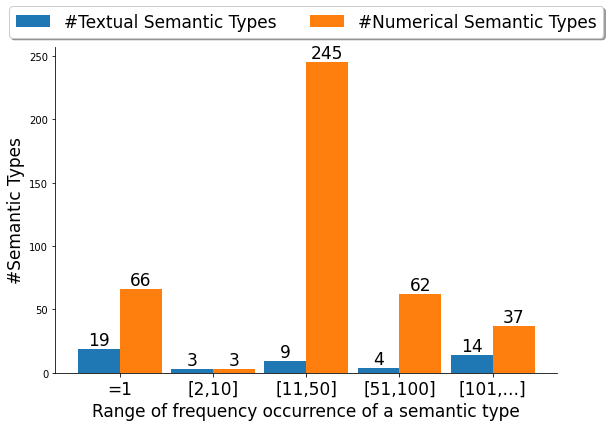

In [23]:
from matplotlib import pyplot as plt

width = 0.45

fig, ax = plt.subplots(figsize=(9,6))

rects = []


## total bar plot

rects.append(ax.bar([0-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] == 1)])], width=width, color="C0", label="#Textual Semantic Types"))
rects.append(ax.bar([0+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] == 1)])], width=width, color="C1", label="#Numerical Semantic Types"))

rects.append(ax.bar([1-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] > 1) & (df["#"] < 11)])], width=width, color="C0"))
rects.append(ax.bar([1+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] > 1) & (df["#"] < 11)])], width=width, color="C1"))

# rects.append(ax.bar([2-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] > 5) & (df["#"] < 11)])], width=width, color="C0"))
# rects.append(ax.bar([2+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] > 5) & (df["#"] < 11)])], width=width, color="C1"))

rects.append(ax.bar([2-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] > 10) & (df["#"] < 51)])], width=width, color="C0"))
rects.append(ax.bar([2+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] > 10) & (df["#"] < 51)])], width=width, color="C1"))

rects.append(ax.bar([3-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] > 50) & (df["#"] < 101)])], width=width, color="C0"))
rects.append(ax.bar([3+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] > 50) & (df["#"] < 101)])], width=width, color="C1"))

rects.append(ax.bar([4-width/2], [len(df[(df["data_type"] == "textual_types") & (df["#"] > 100)])], width=width, color="C0"))
rects.append(ax.bar([4+width/2], [len(df[(df["data_type"] == "numerical_types") & (df["#"] > 100)])], width=width, color="C1"))


fontsize = 17
for rect in rects:
    ax.bar_label(rect, fontsize=fontsize)
    
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
    
ax.set_xticks([0,1,2,3,4],["=1", "[2,10]", "[11,50]", "[51,100]","[101,...]"], fontsize=fontsize)
#ax.set_yticks(ax.get_yticks(),ax.get_yticks(), fontsize=fontsize)
ax.set_ylabel("#Semantic Types", fontsize=fontsize)
ax.set_xlabel("Range of frequency occurrence of a semantic type", fontsize=fontsize)
ax.legend(handles=[rects[0], rects[1]], fontsize=fontsize, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=2, fancybox=True,shadow=True)
plt.savefig(f"./plots/SportsTables_textual_numerical_ranges.png", bbox_inches="tight", dpi=100, transparent=True)
plt.show()

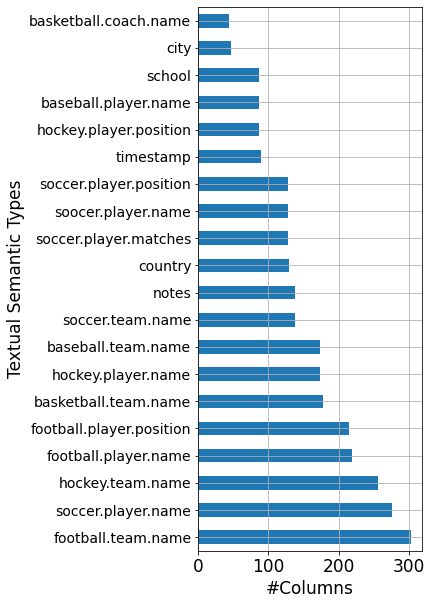

In [14]:
df_plot = df[df["data_type"] == "textual_types"].sort_values(by="#", ascending=False)
#df_plot.plot.barh(x="semantic_type", y="#", figsize=(15,20))
ax = df_plot[:20].plot.barh(x="semantic_type", y="#", figsize=(4,10), label="#Textual Semantic Types")
ax.set_ylabel("Textual Semantic Types", fontsize=fontsize)
ax.set_xlabel("#Columns", fontsize=17)
ax.tick_params(axis="both", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=14)
ax.grid()
ax.get_legend().remove()

plt.savefig(f"./plots/SportsTables_top_textual_types.png", bbox_inches="tight", dpi=100, transparent=True)

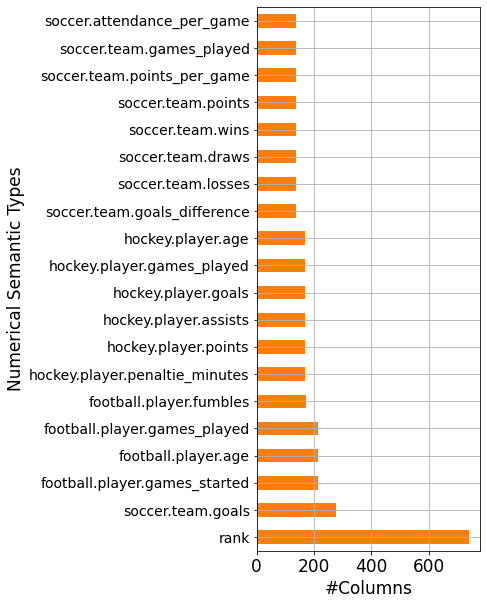

In [15]:
df_plot = df[df["data_type"] == "numerical_types"].sort_values(by="#", ascending=False)
#df_plot.plot.barh(x="semantic_type", y="#", figsize=(15,20))
ax = df_plot[:20].plot.barh(x="semantic_type", y="#", figsize=(4,10), label="#Numerical Semantic Types", color="C1")
ax.set_ylabel("Numerical Semantic Types", fontsize=fontsize)
ax.set_xlabel("#Columns", fontsize=17)
ax.tick_params(axis="both", labelsize=fontsize)
ax.tick_params(axis="y", labelsize=14)

ax.grid()
ax.get_legend().remove()

plt.savefig(f"./plots/SportsTables_top_numerical_types.png", bbox_inches="tight", dpi=100, transparent=True)